In [8]:
from Archivos_Apoyo.AngleCouplingAnalyzer import AngleCouplingAnalyzer
ruta_entrenamiento_robot="logs_lift_leg/general_values_20251015_182343.pid660.csv"
ruta_recompensas="logs_lift_leg/rewards_20251015_182343.pid660.csv"
anglecouplinganalyzer=AngleCouplingAnalyzer()

In [9]:
df_general=anglecouplinganalyzer.cargar_csv(ruta_entrenamiento_robot)
df_recompensas=anglecouplinganalyzer.cargar_csv(ruta_recompensas)

In [10]:
angulos_joints=anglecouplinganalyzer.split_parameters_df(df_general, startswith="q_")
angular_speed=anglecouplinganalyzer.split_parameters_df(df_general, startswith="vel_")
torque=anglecouplinganalyzer.split_parameters_df(df_general, startswith="τ_reaction_")
forces=anglecouplinganalyzer.split_parameters_df(df_general, startswith="Forces_")
pressures=anglecouplinganalyzer.split_parameters_df(df_general, startswith="Pressure_")
coms=anglecouplinganalyzer.split_parameters_df(df_general, startswith="COM_")
zmps=anglecouplinganalyzer.split_parameters_df(df_general, startswith="ZMP_")
df_angle_speed = df_general.loc[:, df_general.columns.str.startswith(("q_", "vel_"))]
df_angle_com = df_general.loc[:, df_general.columns.str.startswith(("q_left_hip", "q_right_hip", "COM_"))]
df_presiones_velocidades=df_general.loc[:, df_general.columns.str.startswith(("vel_", "Pressure_"))]

In [11]:
df_presiones_velocidades

,vel_left_hip_pitch_joint,Pressure_left_hip_pitch_jointflexion,Pressure_left_hip_pitch_jointextension,vel_left_hip_roll_joint,Pressure_left_hip_roll_jointflexion,Pressure_left_hip_roll_jointextension,vel_left_knee_joint,Pressure_left_knee_jointflexion,Pressure_left_knee_jointextension,vel_left_ankle_pitch_joint,...,Pressure_right_hip_roll_jointextension,vel_right_knee_joint,Pressure_right_knee_jointflexion,Pressure_right_knee_jointextension,vel_right_ankle_pitch_joint,Pressure_right_ankle_pitch_jointflexion,Pressure_right_ankle_pitch_jointextension,vel_right_ankle_roll_joint,Pressure_right_ankle_roll_jointflexion,Pressure_right_ankle_roll_jointextension
0,9.855,0.196174,0.000000,-0.177,0.0,0.223496,0.000,0.115561,0.0415,-0.343,...,0.000000,0.005,0.000000,0.056881,-6.353,0.162599,0.00000,0.050,0.0,0.00000
1,9.552,0.142862,0.000000,-0.482,0.0,0.132387,0.001,0.105846,0.0000,-0.428,...,0.051662,-0.000,0.000000,0.051656,-0.000,0.116093,0.00000,-1.802,0.0,0.00000
2,9.855,0.196174,0.000000,-0.177,0.0,0.223496,0.000,0.115561,0.0415,-0.343,...,0.000000,0.005,0.000000,0.056881,-6.353,0.162599,0.00000,0.050,0.0,0.00000
3,9.552,0.142862,0.000000,-0.482,0.0,0.132387,0.001,0.105846,0.0000,-0.428,...,0.051662,-0.000,0.000000,0.051656,-0.000,0.116093,0.00000,-1.802,0.0,0.00000
4,9.855,0.196174,0.000000,-0.177,0.0,0.223496,0.000,0.115561,0.0415,-0.343,...,0.000000,0.005,0.000000,0.056881,-6.353,0.162599,0.00000,0.050,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1625,-0.391,0.000000,0.914803,0.205,0.0,1.000000,3.586,0.548651,1.0000,36.081,...,0.000000,0.002,0.679029,0.000000,-1.558,0.886562,0.00000,-14.394,0.0,0.67347
1626,-3.116,0.000000,0.838493,1.133,0.0,1.000000,11.028,0.000000,0.0000,-9.706,...,1.000000,0.000,0.000000,0.835470,0.000,0.000000,0.06536,-0.053,1.0,0.00000
1627,4.587,0.049588,1.000000,-0.333,0.0,1.000000,-0.000,0.167051,0.0000,0.002,...,1.000000,0.000,0.000000,0.635383,0.000,1.000000,0.00000,-0.042,1.0,0.00000
1628,1.143,0.134065,0.420552,0.048,0.0,1.000000,-3.728,0.000000,0.0000,0.000,...,1.000000,0.004,0.000000,0.681384,0.115,0.684582,0.00000,0.000,1.0,0.00000


In [12]:
corr_angulos = anglecouplinganalyzer.correlacion_entre_params(angulos_joints)
corr_angular_speed = anglecouplinganalyzer.correlacion_entre_params(angular_speed)
corr_torque = anglecouplinganalyzer.correlacion_entre_params(torque)
corr_forces = anglecouplinganalyzer.correlacion_entre_params(forces)
corr_presiones=anglecouplinganalyzer.correlacion_entre_params(pressures)
corr_recompensas=anglecouplinganalyzer.correlacion_entre_params(df_recompensas.iloc[:,3:])
corr_coms=anglecouplinganalyzer.correlacion_entre_params(coms)
corr_zmp=anglecouplinganalyzer.correlacion_entre_params(zmps)

In [13]:
corr_angulo_velocidad=anglecouplinganalyzer.correlacion_entre_params(df_angle_speed)
corr_velocidad_presiones=anglecouplinganalyzer.correlacion_entre_params(df_presiones_velocidades)
corr_com_angulo=anglecouplinganalyzer.correlacion_entre_params(df_angle_com)

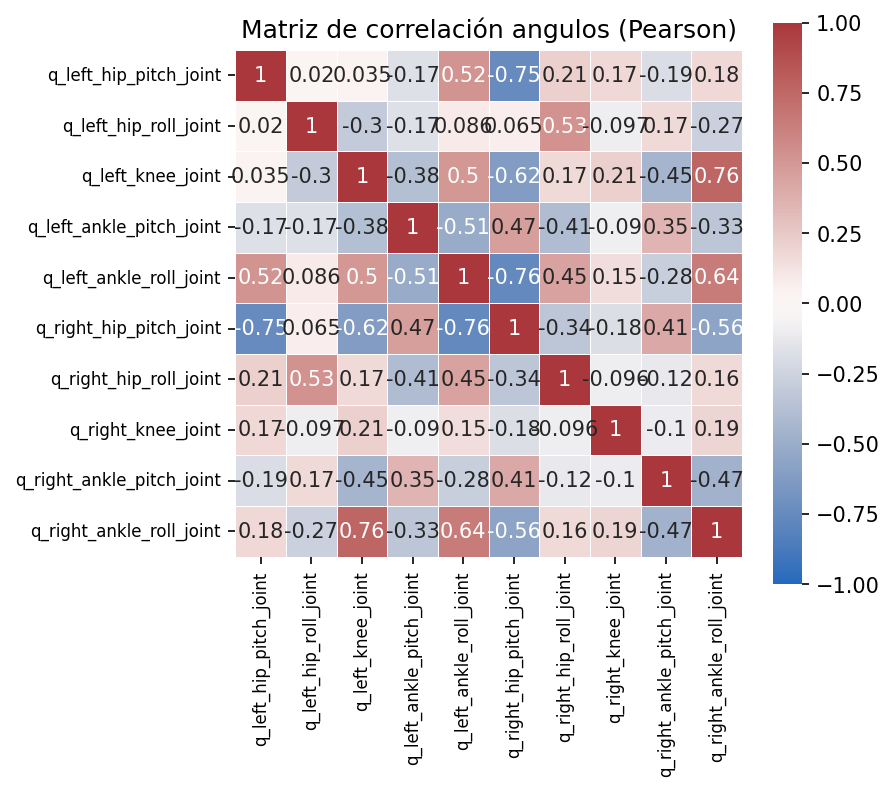

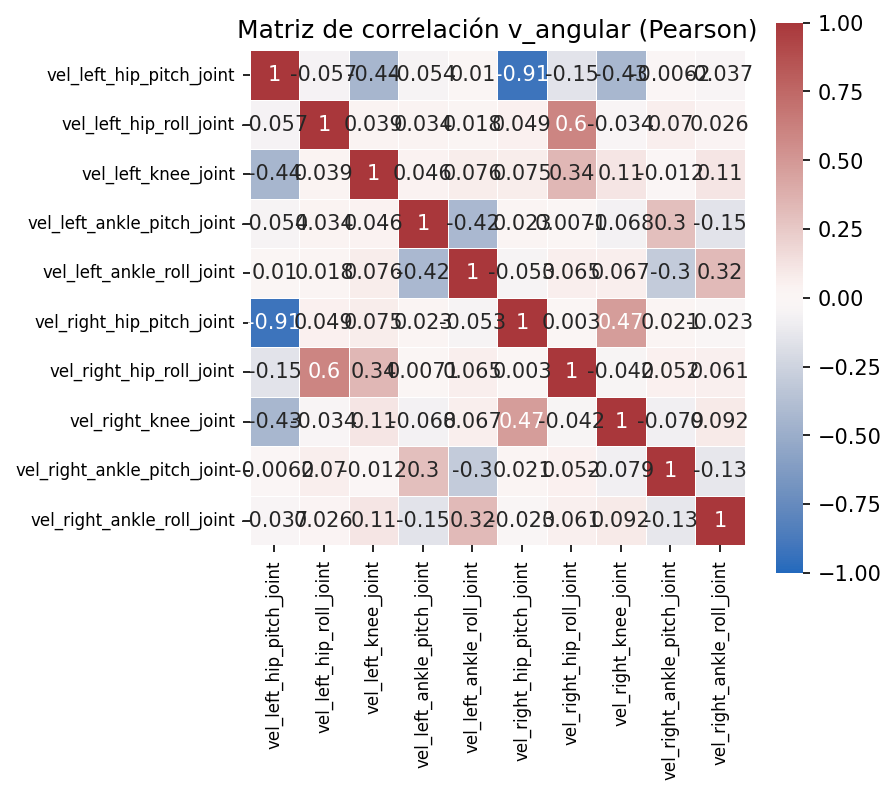

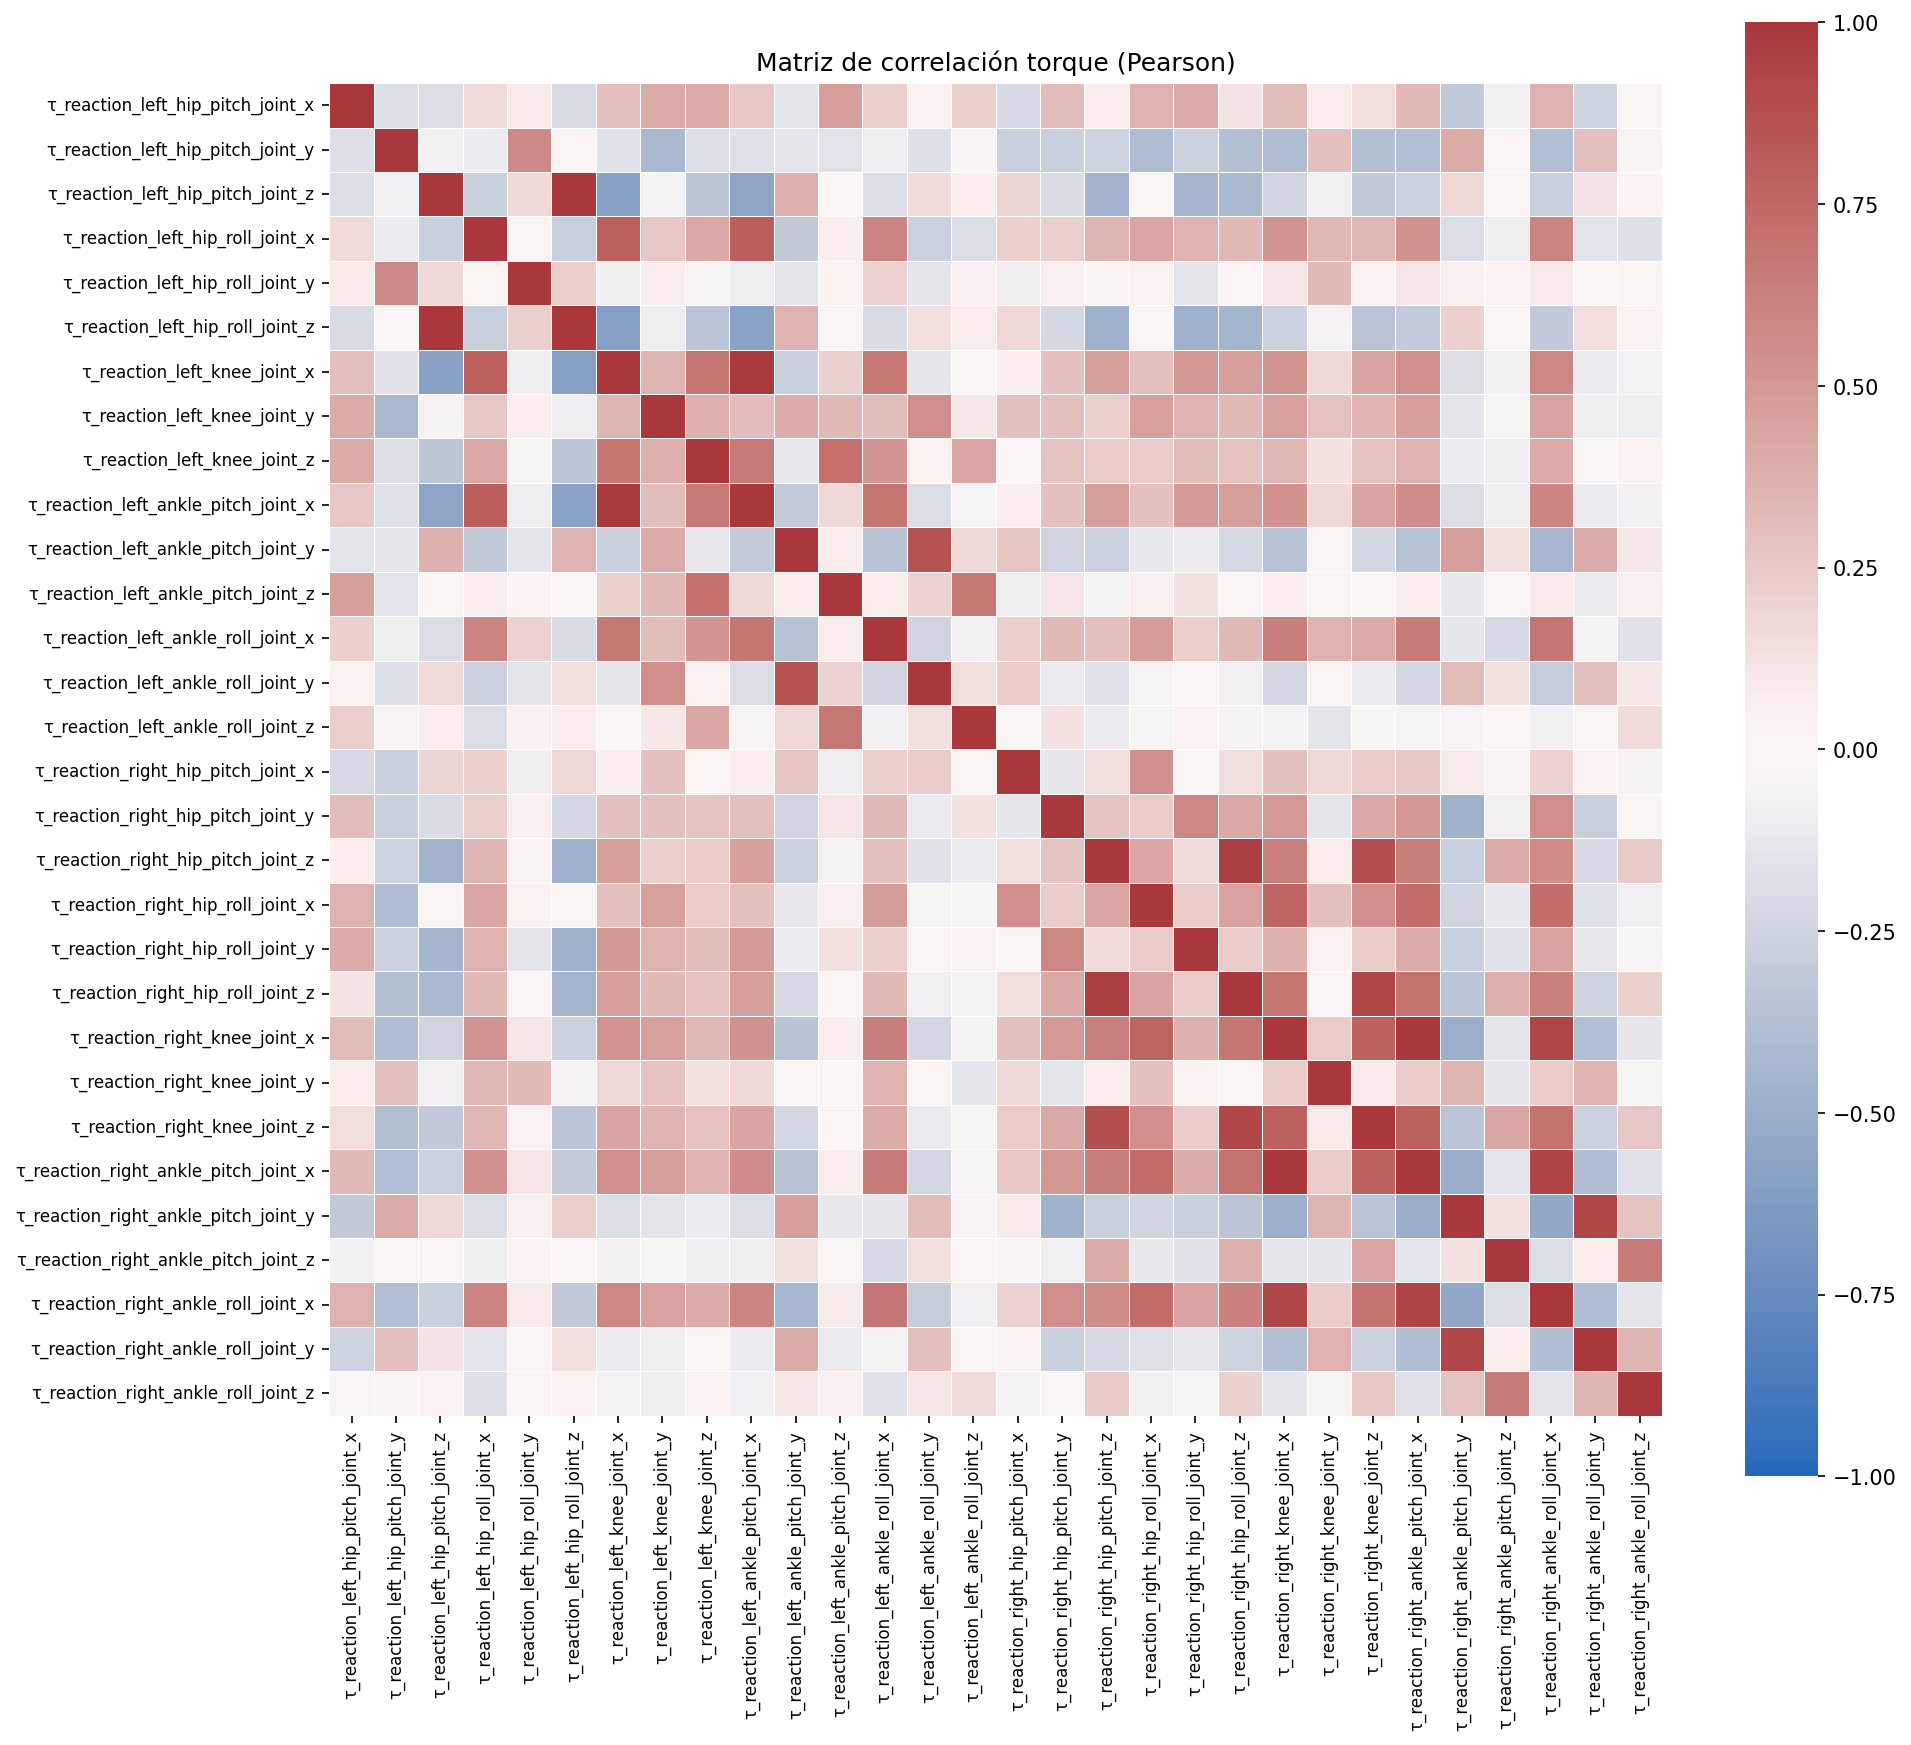

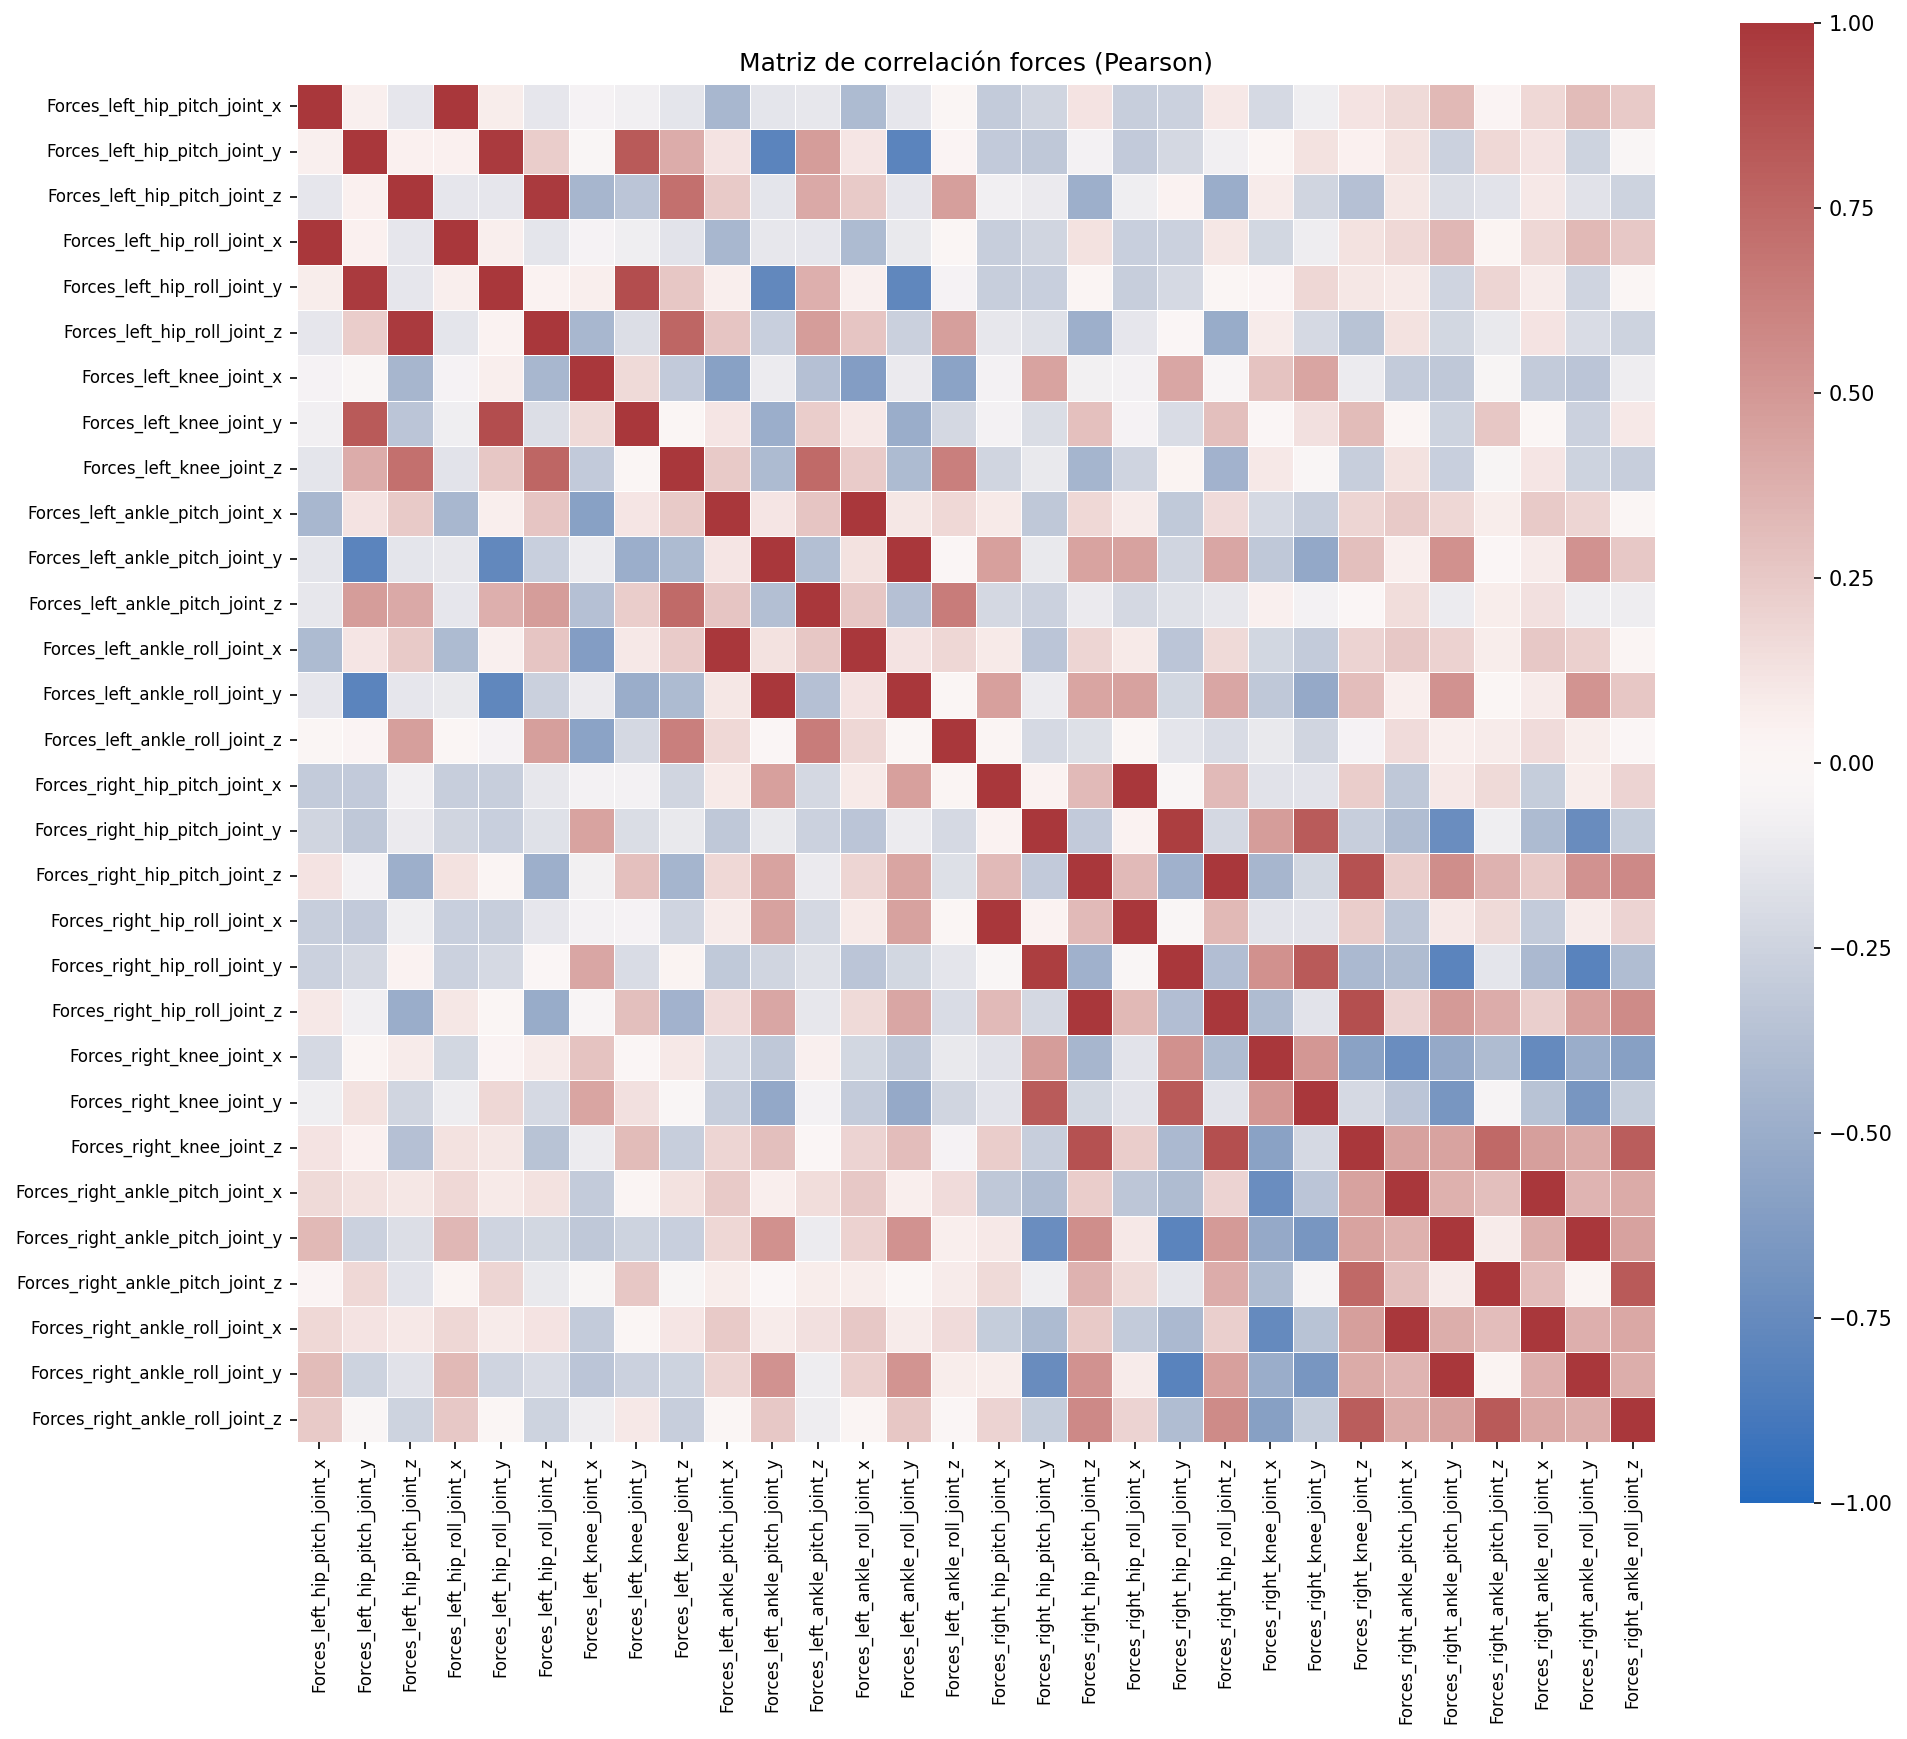

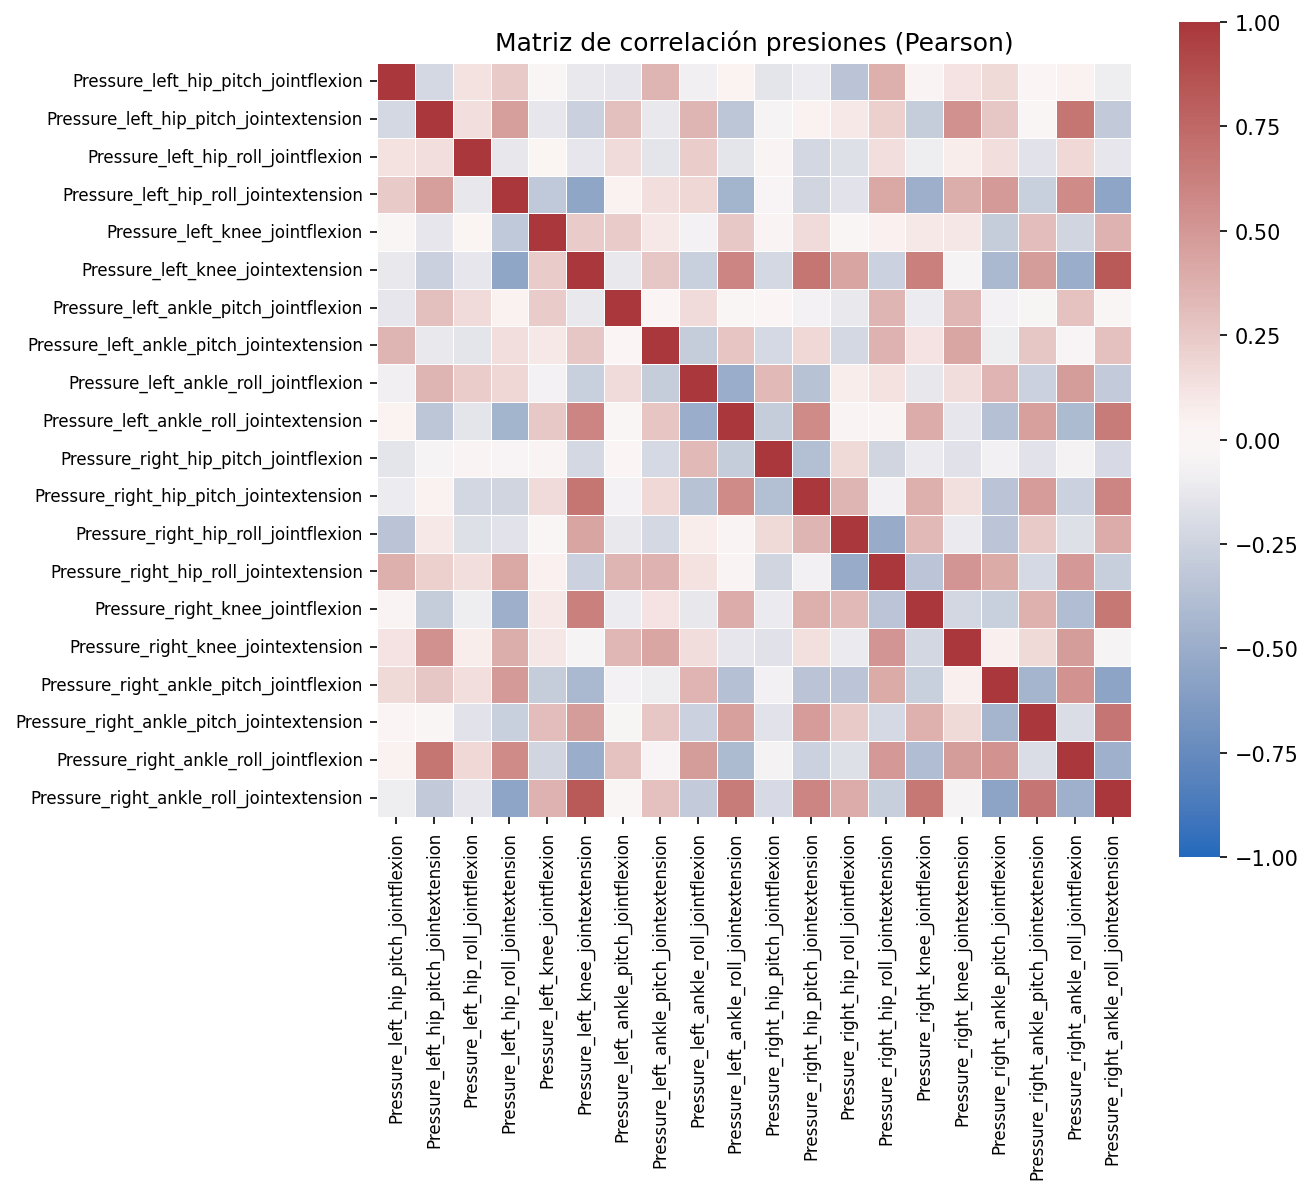

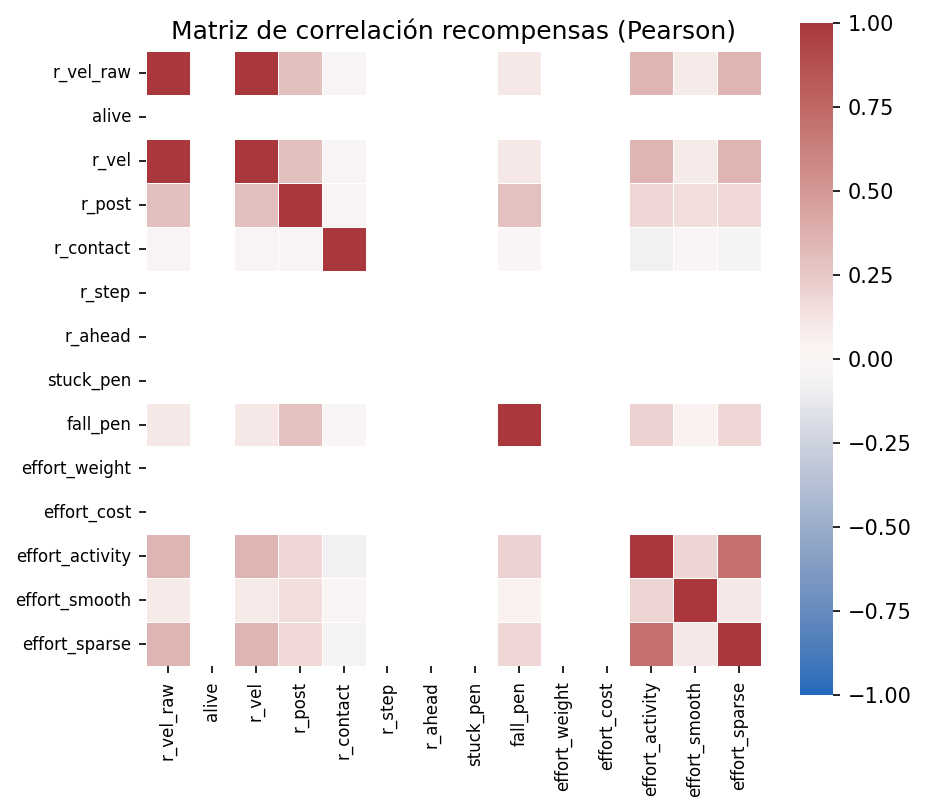

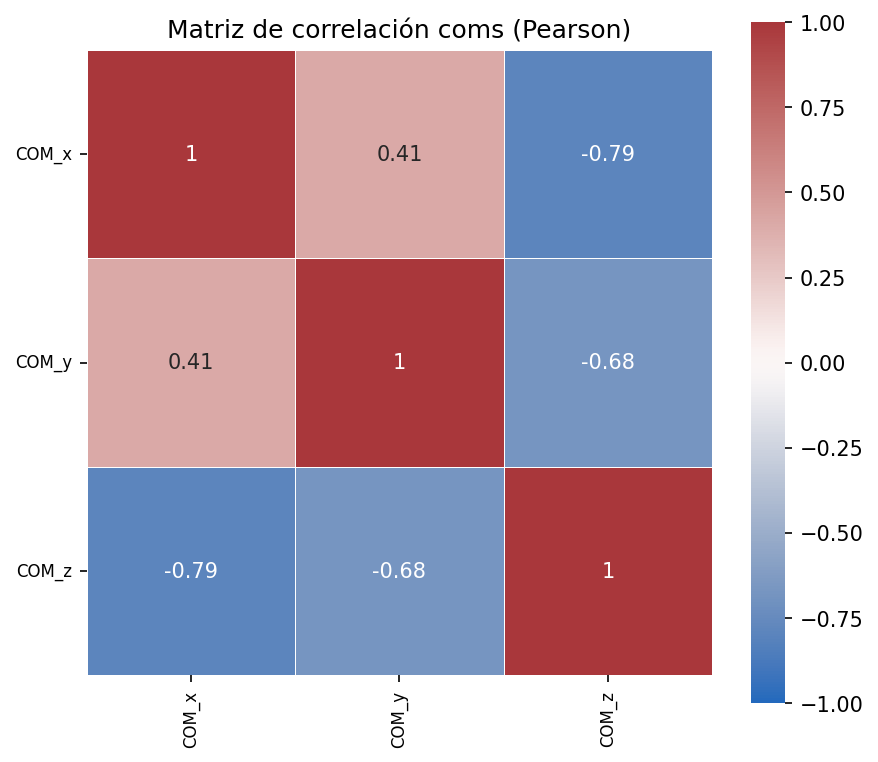

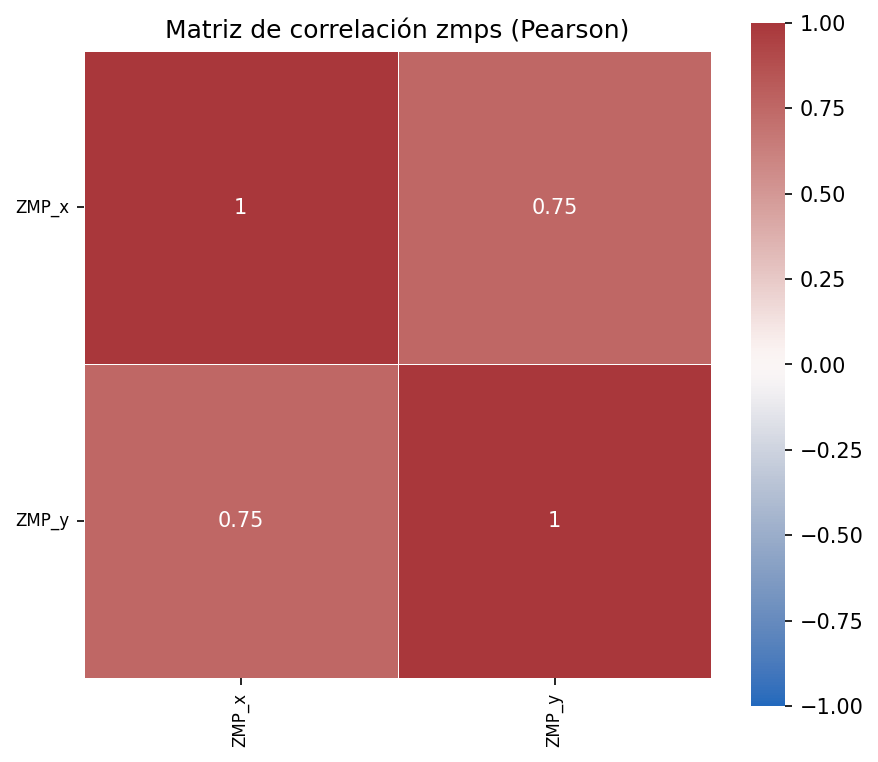

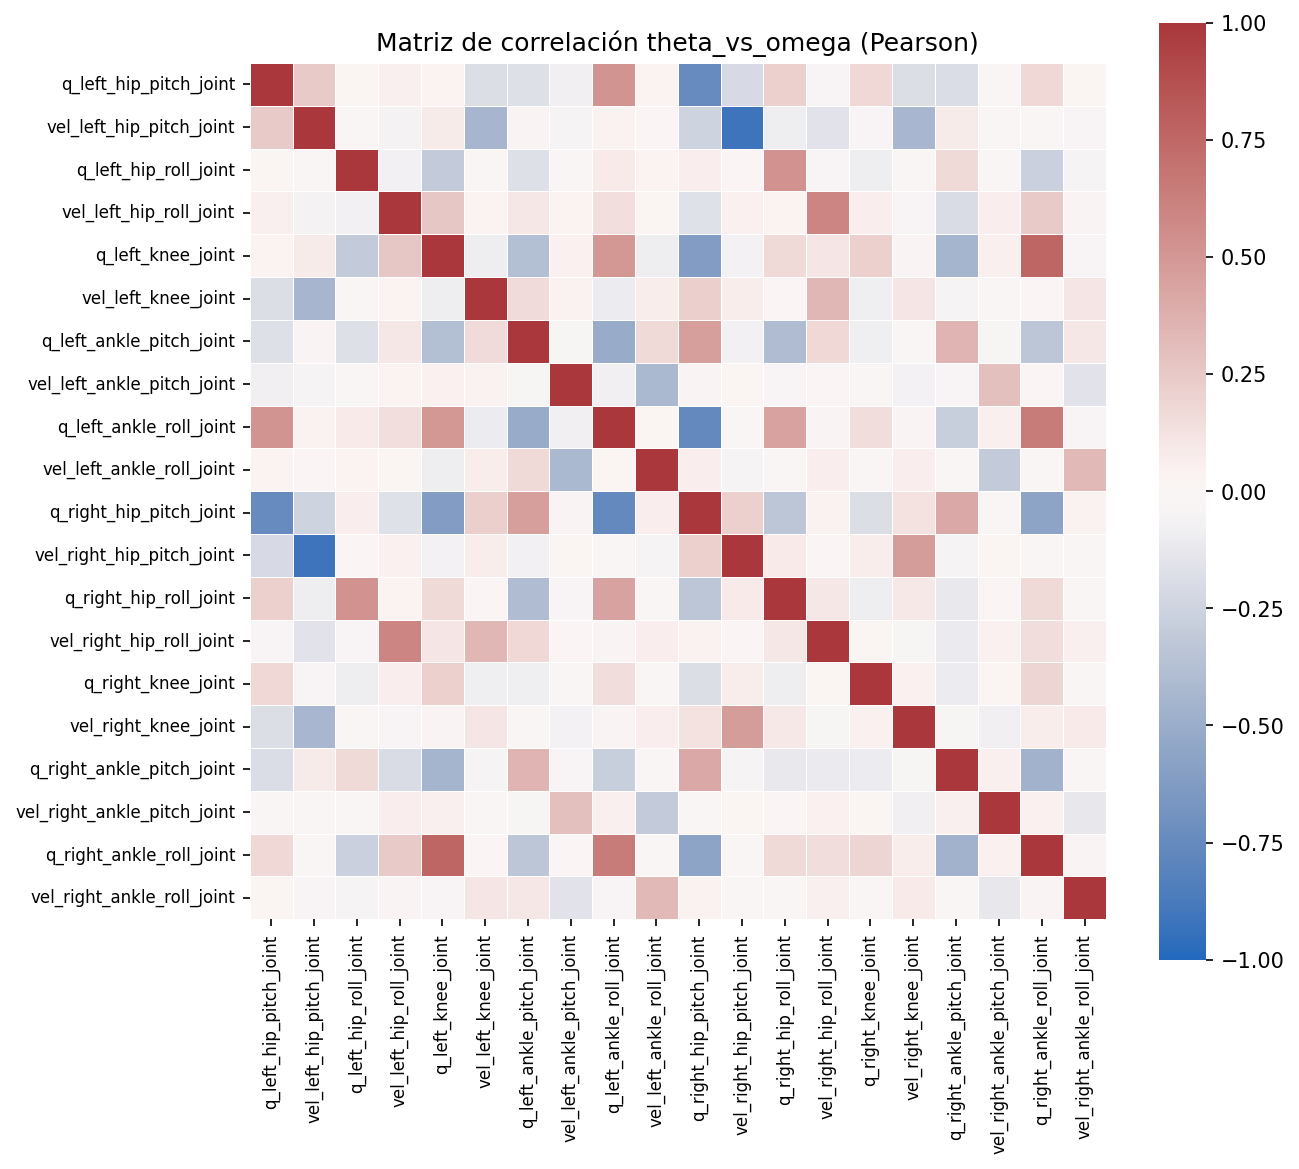

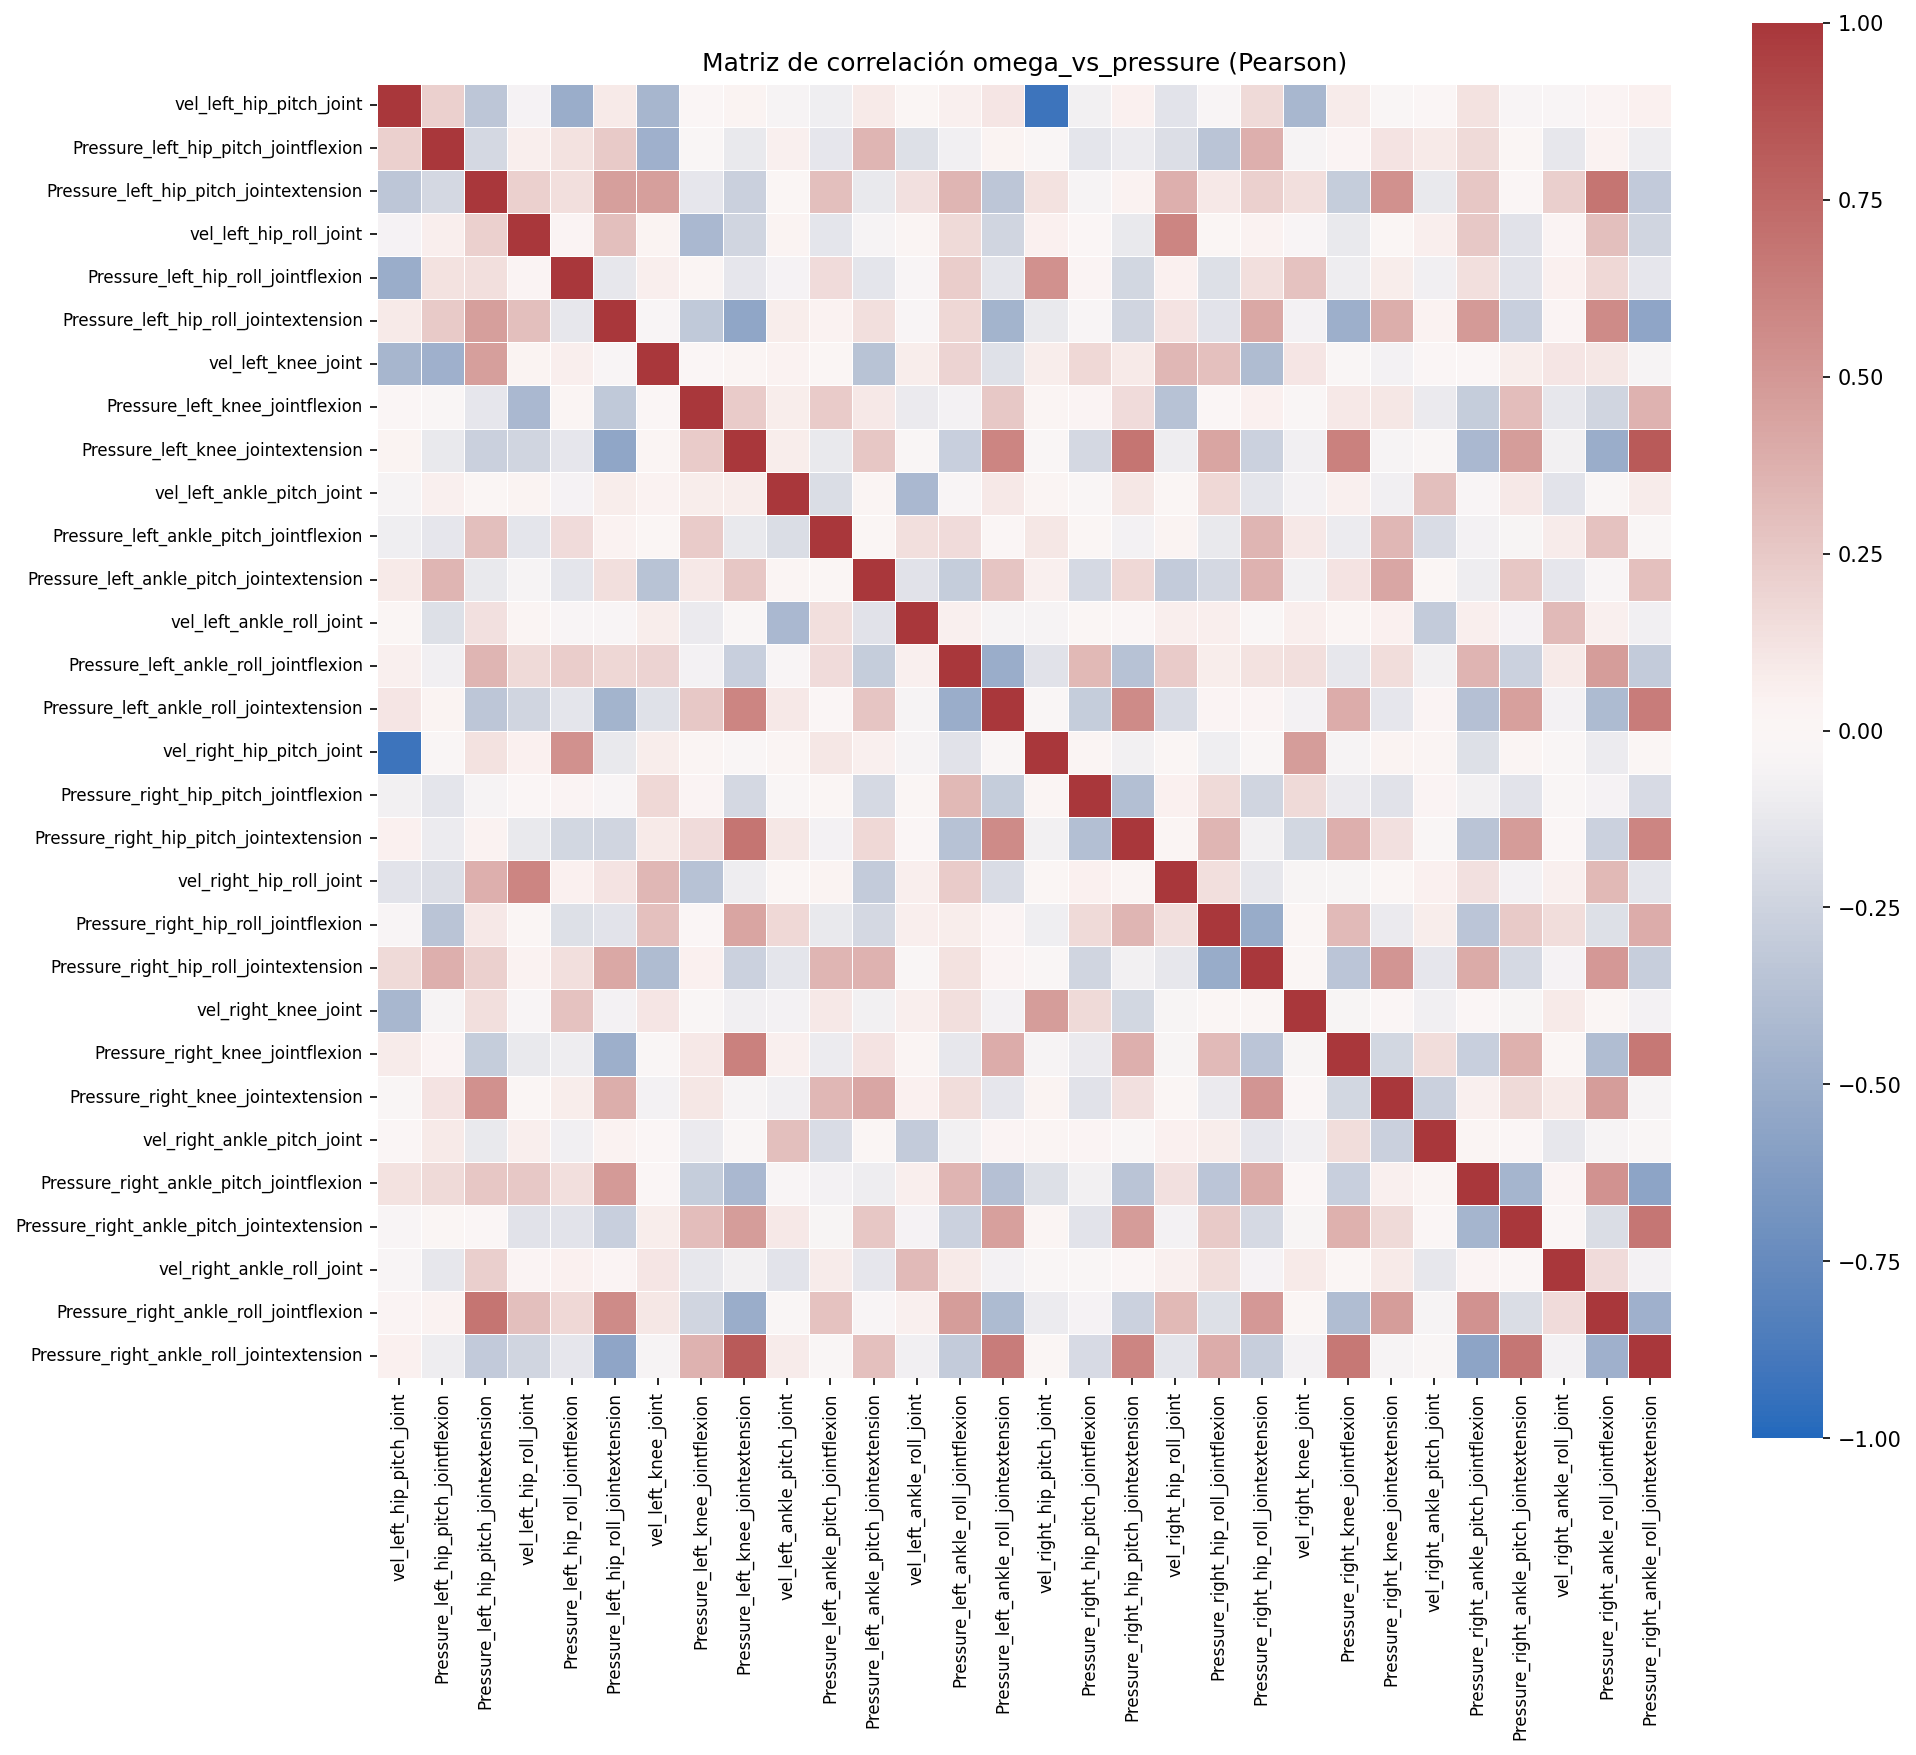

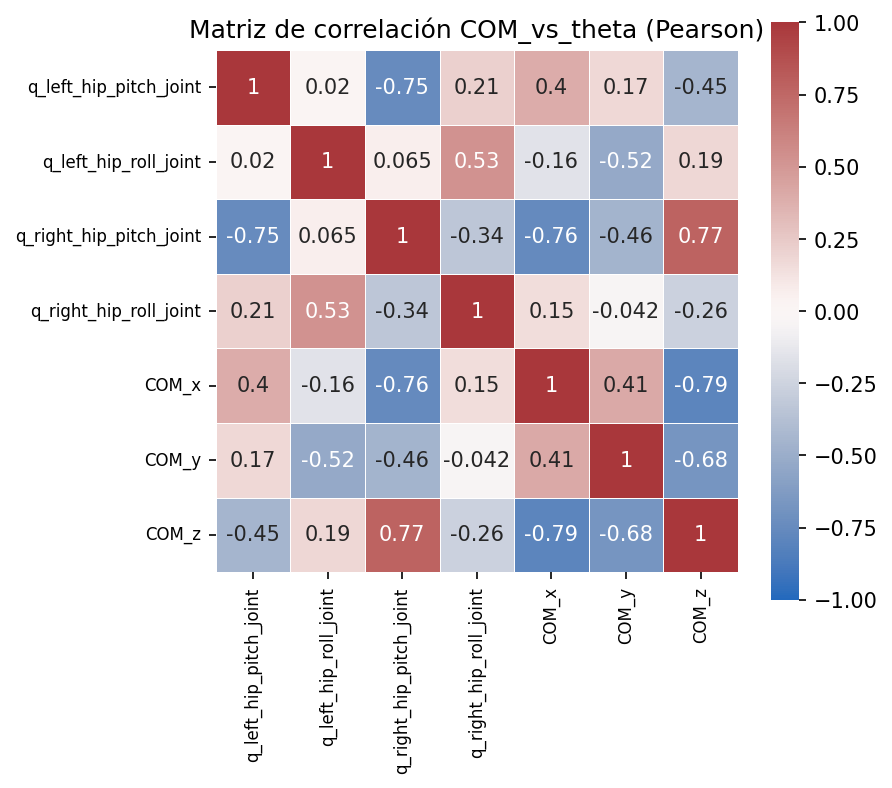

In [14]:
anglecouplinganalyzer.creacion_correlaciones(corr_angulos,"angulos")
anglecouplinganalyzer.creacion_correlaciones(corr_angular_speed, "v_angular")
anglecouplinganalyzer.creacion_correlaciones(corr_torque,"torque", annot=False)
anglecouplinganalyzer.creacion_correlaciones(corr_forces, "forces", annot=False)
anglecouplinganalyzer.creacion_correlaciones(corr_presiones, "presiones", annot=False)
anglecouplinganalyzer.creacion_correlaciones(corr_recompensas, "recompensas", annot=False)
anglecouplinganalyzer.creacion_correlaciones(corr_coms, "coms")
anglecouplinganalyzer.creacion_correlaciones(corr_zmp, "zmps")
anglecouplinganalyzer.creacion_correlaciones(corr_angulo_velocidad, "theta_vs_omega", annot=False)
anglecouplinganalyzer.creacion_correlaciones(corr_velocidad_presiones, "omega_vs_pressure", annot=False)
anglecouplinganalyzer.creacion_correlaciones(corr_com_angulo, "COM_vs_theta")